# Algorithms and Complexity


Recall that an *algorithm* is a sequence of instructions for solving a problem. However, not all algorithms are equal. When evaluating algorithms, it is important to consider the following:

- correctness - does the algorithm correctly give an answer to the problem, in all cases?
- efficiency - does the algorithm efficiencly use resources
    - how fast is the algorithm in the best case, worst case, or average case
    - how much memory is required by the algorithm
- ease of understanding - how easy is it to understand the logic of the algorithm

In this module we are concerned with the efficiency of algorithms.

## Example: Find the sum of the numbers 1 - 100

An algorithm for finding the sum of all numbers between 1 - 100 is given below:

1. Set the value of sum to 0
2. For each integer num between 1 and 100 :
    - add *num* to the sum
3. Output the *sum*


Below is Python code that implements this algorithm.

In [ ]:
sum = 0
for num in range(1,101): 
    sum = sum + num
print(sum)

### Question: How many operations are executed for each step?

1. Step (1) requires one assignment operation
2. Step (2) begins a loop that iterates through 100 numbers. The loop (which involves assigning an integer to *num*, and adding *num* to the current *sum*, is repeated 100 times). <span style = "color:red">This step also includes an assignment operation to update the value of *sum*, and an addition to increase the value of *num* by 1. </span>
3. Step (3) requires one output operation

We can therefore say that the algorithm takes the following number of operations: <span style = 'color:red'>$1 + 4(100) + 1 = 2 + 4(100)$.</span> 

More specifically, suppose it takes $c_1$ ms for each *assignment*, $c_2$ ms for each *addition*, and $c_3$ ms for each *output* statement. Then the total running time will be <span style = 'color:red'> $c_1 + 100(2c_1 + 2c_2) + c_3$.</span>

If we are adding the numbers 1 - *n*, then the total running time will be <span style = 'color:red'>$c_1 + n(2c_1 + 2c_2) + c_3$.</span>

In general, we are interested only in the terms that depend on the size of the input, and can ignore constants. In other words, we only care about the *order of magnitude* (this is discussed more below). 

## We will now consider the general algorithm for adding the integers 1 - *n* (Version 1)

1. Set the value of sum to 0
2. For each integer num between 1 and n: 
    - add *num* to the *sum*
3. Output the *sum*

The analysis of this algorithm finds the following:
- The total number of operations is:  <span style = 'color:red'>$1 + 4n + 1 = 2 + 4n$</span>
    - if we ignore constants, this simplifies to just $n$
- Using the constants above, the total running time is: <span style = 'color:red'>$c_1 + n(2c_1 + 2c_2) + c_3$.</span>
    - if we ignore constants, this simplifies to just $n$

## Order of magnitude *n* and $\Theta(n)$

We therefore say that the running time is of *order of magnitude n*, written as $\Theta(n)$. This notation is known as "Big Theta" notation and the expression $\Theta(n)$ is read as "order n".

If the running time of an algorithm is $\Theta(n)$, then doubling the value of *n* will roughly double the running time. In other words, if the input size increases by a factor of 2, the algorithm will take twice as long to run.


**Note on terminology:** Big Theta notation provides a *tight* bound, which means that the order of magnitude is no larger or smaller than what is indicated. Another notation, called Big O notation, technically is only an upper bound. However, Big O notation is often misused (or abused). For example, saying an algorithm is O(n) technically means that its order of magnitude is no more than order *n*. But this is true if the algorithm has a constant running time. 

### Can we come up with a more efficient algorithm (Version 2)

Mathematically, the sum of the numbers between 1 - *n* can be found using the formula: $n(n+1)/2$

Why??

A simple algorithm therefore is the following:
1. set the value of *sum* to *n(n+1)/2*
2. output the *sum*


What is the running time?
The total number of operations is 3 for step 1 (there is a single multiplication, a single addition, and a single division), and 1 for step 2. The total number of operations is 5, and this does not depend on *n*. This algorithm therefore has a constant running time, which is denoted $\Theta(1)$.

<span style = 'color:red'>Correction: The total number of operations for step 1 is 4, because there is also an assignment. The total number of operations is therefore 6. However, the running time is still $\Theta(1)$.</span>

Below is Python code that implements this algorithm, for where *n* = 100.

In [ ]:
n = 100
sum = n*(n+1)/2
sum

## Comparison of orders of magnitude

The order of magnitude of the running time tells us how much longer an algorithm takes to run as the input size increases.

In particular,
- If the running time of an algorithm is constant, then increasing the input size has no effect on the running time
- If the running time of an algorithm is order *n*, then doubling the input size causes the algorithm to take twice as long.
- If the running time of an algorithm is *log n* (where the log has base 2), then doubling the input size requires that the algorithm adds 1 additional operation (or 1 additional set of operations, independent of *n*)
- If the running time of an algorithm is *n^2*, then doubling the input size causes the algorithm to take 4 times as long (and increasing the input size by a factor of 10, causes the algorithm to take 100 times as long).

Note that this graph is labeled using Big O notation, but the same relationships apply for Big Theta notation.

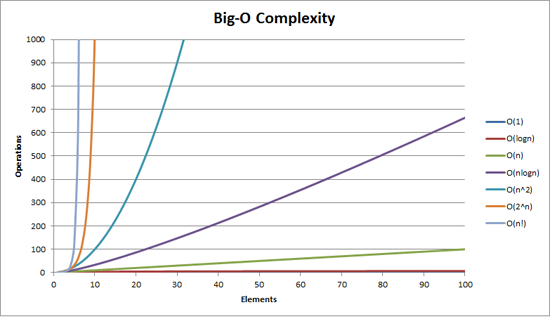

### What about the constants?

See: https://gdancik.github.io/CSC-180/data/notes/RunningTimes.pdf


### Computers are fast, so why do we care?

A version of the AMD chip, available in the latest MacBook Pro, has a speed of 11.2 teraflops (it can carry out 11.2 trillion floating point operations (FLOPS) a second). 

Even with such speeds, some algorithms are not practical when the input size is large. This is not uncommon, databases can easily have records numbering in the billions, trillions, or more. We will see later that there are sorting algorithms that are $\Theta(n^2)$, though the best sorting algorithms are $\Theta(n\ log\ n)$.

| | $n$ | $\Theta(n)$ | | $\Theta(n^2)$ |
| --- | --- | --- | --- | --- |
| One thousand | 1,000 | 0.0000000008333333 sec | | 0.0000008333333 sec |
| One hundred million | 100,000,000 | 0.00008333333 sec | | 8333.333 sec = 2.31 hours |
| One hundred billion | 100,000,000,000 | 0.08333333 sec | |8333333333 sec = 264 years |




### Back to finding the sum of integers 1 - n. What about memory (space)?

For version 1, the only requirement is that we store the *sum* and the current *num* we are adding to it. So the space requirement is 2. For version 2, we only need to store the result, so the space requirement is 1. For space, we do not simplify based on orders of magnitude because constants are more important. We also do not include the space requirement for the input, only the requirements regarding how the algorithm effects the input. The table below summarizes the Analysis of Algorithms comparing Version 1 and Version 2.


### Comparison of version 1 (loop) and version 2 (formula) for adding the integers between 1 - *n*


- Time:
    - Version 1 (loop): $\Theta(n)$
    - Version 2 (formula): $\Theta(1)$
- Space:
    - Version 1 (loop): 2
    - Version 2 (formula): 1
    
### Which algorithm is better?